In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Load CSV data
csv_path = '../data/images/original/ground_truth/train_big_size_A_B_E_K_WH_WB.csv'
df = pd.read_csv(csv_path)

print(f"Total rows in dataset: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"Sample data:")
df.head()

Total rows in dataset: 6962
Columns: ['Image', 'x1', 'y1', 'x2', 'y2', 'Label']
Sample data:


,Image,x1,y1,x2,y2,Label
0,L_07_05_16_DSC00126.JPG,2488,357,2520,427,3
1,L_07_05_16_DSC00126.JPG,1707,446,1746,471,3
2,L_07_05_16_DSC00127.JPG,2612,2314,2641,2361,3
3,L_07_05_16_DSC00127.JPG,1793,2450,1843,2475,3
4,L_07_05_16_DSC00150.JPG,1492,1381,1586,1441,2


In [16]:
# Select rows 200-250
selected_rows = df.iloc[200:250]
print(f"Selected rows: {len(selected_rows)}")

# Get unique images in this range
unique_images = selected_rows['Image'].unique()
print(f"Unique images in selected range: {len(unique_images)}")
print(f"Images: {unique_images[:5]}...")  # Show first 5

selected_rows.head(10)

Selected rows: 50
Unique images in selected range: 9
Images: ['L_07_05_16_DSC00603.JPG' 'L_07_05_16_DSC00604.JPG'
 'L_07_05_16_DSC00605.JPG' 'L_07_05_16_DSC00612.JPG'
 'L_07_05_16_DSC00613.JPG']...


,Image,x1,y1,x2,y2,Label
200,L_07_05_16_DSC00603.JPG,42,720,163,774,2
201,L_07_05_16_DSC00603.JPG,214,918,320,973,2
202,L_07_05_16_DSC00603.JPG,46,950,166,1011,2
203,L_07_05_16_DSC00604.JPG,1901,1590,1985,1678,2
204,L_07_05_16_DSC00604.JPG,2053,1502,2114,1581,2
205,L_07_05_16_DSC00604.JPG,2116,1781,2215,1852,2
206,L_07_05_16_DSC00604.JPG,2038,1817,2111,1905,2
207,L_07_05_16_DSC00604.JPG,2235,1864,2316,1931,2
208,L_07_05_16_DSC00604.JPG,2115,1885,2192,1968,2
209,L_07_05_16_DSC00604.JPG,831,2517,945,2565,2


In [17]:
# Function to display image with bounding boxes
def display_image_with_boxes(image_name, bboxes, images_dir='../data/images/original/train/'):
    image_path = os.path.join(images_dir, image_name)
    
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return
    
    # Load image and auto-rotate based on EXIF data
    img = Image.open(image_path)
    
    # Create figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(img)
    
    # Add bounding boxes
    colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
    for i, (_, row) in enumerate(bboxes.iterrows()):
        x1, y1, x2, y2, label = row['x1'], row['y1'], row['x2'], row['y2'], row['Label']
        
        # Create rectangle
        width = x2 - x1
        height = y2 - y1
        rect = patches.Rectangle((x1, y1), width, height, 
                               linewidth=2, edgecolor=colors[i % len(colors)], 
                               facecolor='none')
        ax.add_patch(rect)
        
        # Add label
        ax.text(x1, y1-10, f'Label: {label}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[i % len(colors)], alpha=0.7),
                fontsize=10, color='white')
    
    ax.set_title(f'{image_name} ({len(bboxes)} boxes)')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display first unique images with their bounding boxes
for i, image_name in enumerate(unique_images[384:320]):
    print(f"\n--- Image {i+1}: {image_name} ---")
    image_bboxes = selected_rows[selected_rows['Image'] == image_name]
    print(f"Number of bounding boxes: {len(image_bboxes)}")
    display_image_with_boxes(image_name, image_bboxes)

Bounding boxes for L_07_05_16_DSC00604.JPG:
                       Image    x1    y1    x2    y2  Label
203  L_07_05_16_DSC00604.JPG  1901  1590  1985  1678      2
204  L_07_05_16_DSC00604.JPG  2053  1502  2114  1581      2
205  L_07_05_16_DSC00604.JPG  2116  1781  2215  1852      2
206  L_07_05_16_DSC00604.JPG  2038  1817  2111  1905      2
207  L_07_05_16_DSC00604.JPG  2235  1864  2316  1931      2
208  L_07_05_16_DSC00604.JPG  2115  1885  2192  1968      2
209  L_07_05_16_DSC00604.JPG   831  2517   945  2565      2
210  L_07_05_16_DSC00604.JPG   198  2454   320  2524      2
211  L_07_05_16_DSC00604.JPG   597  3208   681  3281      2
212  L_07_05_16_DSC00604.JPG   373  3211   475  3266      2
213  L_07_05_16_DSC00604.JPG   353  2978   473  3022      2
214  L_07_05_16_DSC00604.JPG   275  2966   342  3015      2
215  L_07_05_16_DSC00604.JPG   204  2994   285  3027      2
216  L_07_05_16_DSC00604.JPG   172  3065   248  3132      2
217  L_07_05_16_DSC00604.JPG    57  2918   155  2981    

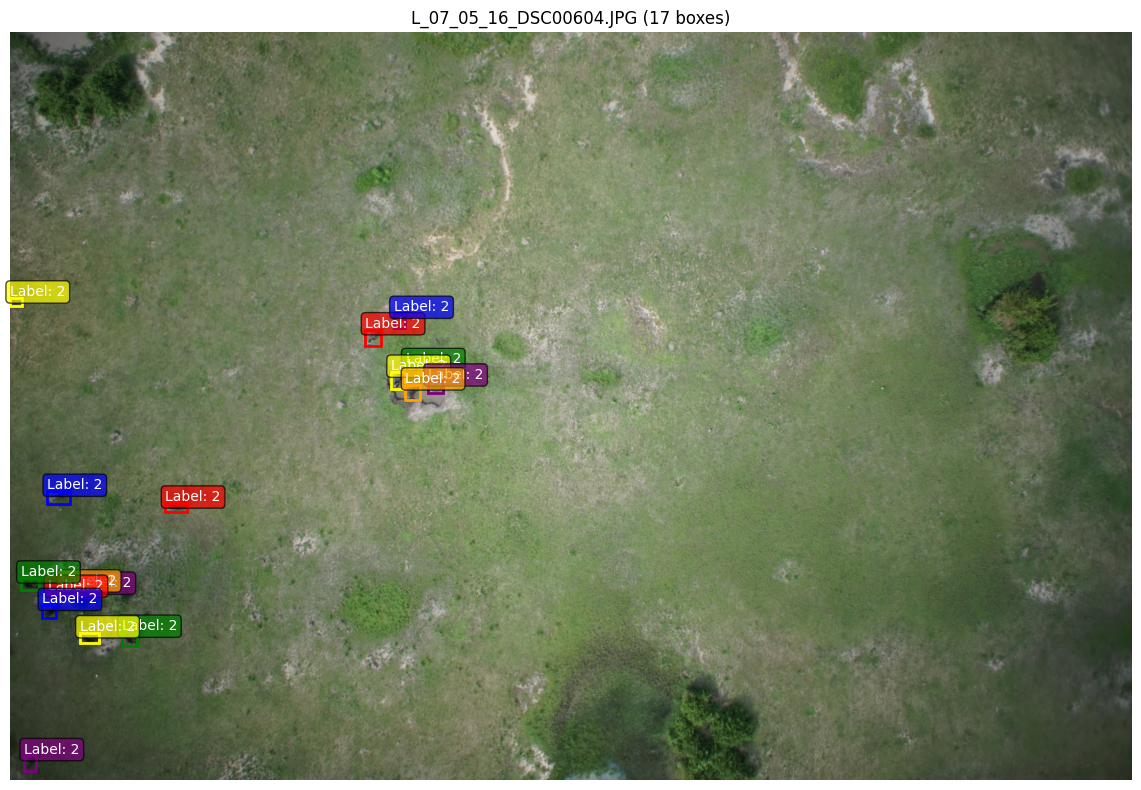

In [18]:
# Display specific image: L_07_05_16_DSC00631.JPG
specific_image = 'L_07_05_16_DSC00604.JPG'
specific_bboxes = df[df['Image'] == specific_image]

print(f"Bounding boxes for {specific_image}:")
print(specific_bboxes)
print(f"\nNumber of bounding boxes: {len(specific_bboxes)}")

if len(specific_bboxes) > 0:
    display_image_with_boxes(specific_image, specific_bboxes)
else:
    print(f"No bounding boxes found for {specific_image}")